## State-by-State Analysis of Funding in Education Mid-Western States

This will be presented to a non-technical audience

In this analysis of state by state data, we will be looking at the differences in expenditure when it comes to primary education. The Mid-Western states will be the focus of this analysis.

A primary objective will be to determine the highest spender and the lowest spender. Once those have been identified a simple hypothesis will be formed to explain why those states spend so differently. Any significant divide in states or groups of states will also be of interest.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-15/kids.csv')

The data provides us with 23 different variables per state to look into. That being said, the foucus is still on the PK12ed value, which is responsible for defining the expenditure by state at the primary education level.

In [3]:
df.head()

,state,variable,year,raw,inf_adj,inf_adj_perchild
0,Alabama,PK12ed,1997,3271969.0,4665308.5,3.929449
1,Alaska,PK12ed,1997,1042311.0,1486170.0,7.548493
2,Arizona,PK12ed,1997,3388165.0,4830985.5,3.706679
3,Arkansas,PK12ed,1997,1960613.0,2795523.0,3.891275
4,California,PK12ed,1997,28708364.0,40933568.0,4.282325


In [4]:
df["1000's_inf_adj"] = df['inf_adj'] / 1000

In [5]:
df.shape

(23460, 7)

In [6]:
df.describe()

,year,raw,inf_adj,inf_adj_perchild,1000's_inf_adj
count,23460.000000,2.335800e+04,2.335800e+04,23358.000000,23358.000000
mean,2006.500000,1.181359e+06,1.359983e+06,0.914477,1359.982973
std,5.766404,3.558687e+06,3.998940e+06,1.683124,3998.940101
min,1997.000000,-6.013900e+04,-6.079948e+04,-0.013614,-60.799484
25%,2001.750000,7.198525e+04,8.587576e+04,0.124561,85.875764
50%,2006.500000,2.520024e+05,2.987776e+05,0.327566,298.777562
75%,2011.250000,8.363245e+05,9.850486e+05,0.833619,985.048609
max,2016.000000,8.366609e+07,8.458496e+07,20.273256,84584.960000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23460 entries, 0 to 23459
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             23460 non-null  object 
 1   variable          23460 non-null  object 
 2   year              23460 non-null  int64  
 3   raw               23358 non-null  float64
 4   inf_adj           23358 non-null  float64
 5   inf_adj_perchild  23358 non-null  float64
 6   1000's_inf_adj    23358 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [8]:
df.year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

The date range available is from 1997 to 2016.

Text(0.5, 0, '')

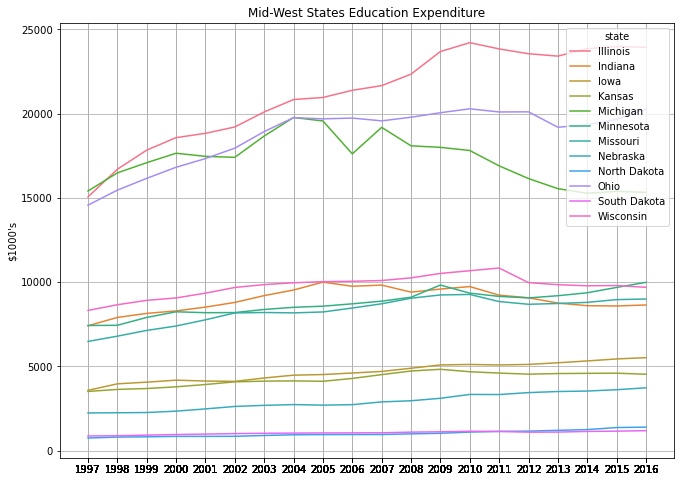

In [9]:
df_var_mask = df[df.variable == 'PK12ed']
selected_states = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 
                   'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
df_mask = df_var_mask.loc[df_var_mask['state'].isin(selected_states)]

dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)

p = sns.lineplot(ax=ax, x="year", y="1000's_inf_adj", hue="state", data=df_mask, markers=True)
p.set_xticks(df_mask['year'])
plt.grid()
plt.ticklabel_format(style = 'plain')
plt.title('Mid-West States Education Expenditure')
p.set_ylabel("$1000's")
p.set_xlabel(None)

The above plot shows three states to be outliers of sorts. They are Illinois, Ohio, and Michigan.
Below is a graph of just those states.

Text(0.5, 0, '')

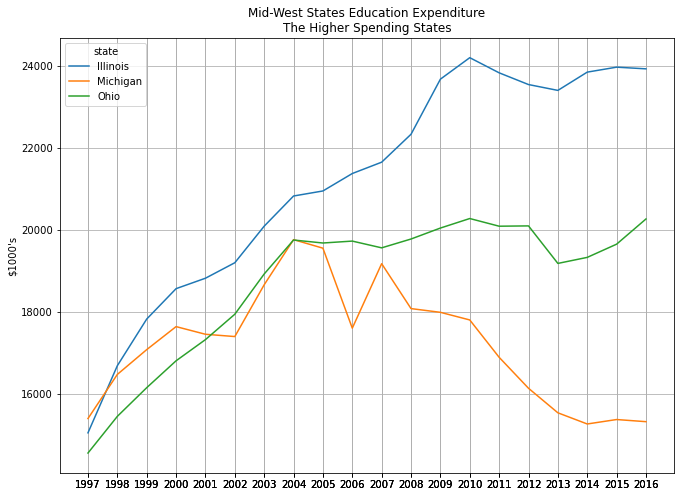

In [10]:
selected_states = ['Illinois', 'Ohio', 'Michigan']
df_mask = df_var_mask.loc[df_var_mask['state'].isin(selected_states)]

dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)

p = sns.lineplot(ax=ax, x="year", y="1000's_inf_adj", hue="state", data=df_mask, markers=True)
p.set_xticks(df_mask['year'])
plt.grid()
plt.ticklabel_format(style = 'plain')
plt.title('Mid-West States Education Expenditure\nThe Higher Spending States')
p.set_ylabel("$1000's")
p.set_xlabel(None)

2004 was Michigans most funded year. After 2005 it something significant changes and there is a intense downward trend. This trend is contrary to all of the other states that tend to have a positive trend. Illinois is currently offering the most funding compared to all of the midwestern states. Ohio migh be looking to catch up, but it is hard to definitively say.

Text(0.5, 0, '')

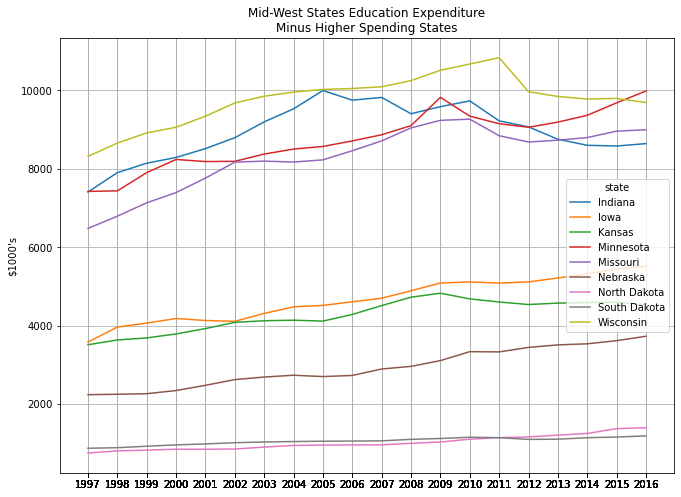

In [11]:
selected_states = ['Indiana', 'Iowa', 'Kansas', 'Minnesota', 
                   'Missouri', 'Nebraska', 'North Dakota', 'South Dakota', 'Wisconsin']
df_mask = df_var_mask.loc[df_var_mask['state'].isin(selected_states)]

dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)

p = sns.lineplot(ax=ax, x="year", y="1000's_inf_adj", hue="state", data=df_mask, markers=True)
p.set_xticks(df_mask['year'])
plt.grid()
plt.ticklabel_format(style = 'plain')
plt.title('''Mid-West States Education Expenditure\nMinus Higher Spending States''')
p.set_ylabel("$1000's")
p.set_xlabel(None)

As for the lower portion of states, Wisconsin was leading up until 2015 when it was over take by Minnesota. North Dakota and South Dakota spend the least out of the midwestern states. The hypothese is that, due to the large area and lower population density in those states, much less money is needed for education at the state level.

Variables such as population density, overall population and, state wide wealth will play a factor in how much is spent of education. There will also be differences in each states approach to education and the funding behind it. 

Now the per child expenditure will be plotted. This should help with all of the above mentioned variables, and give a clearer picture on how individual states fund education.

Text(0.5, 0, '')

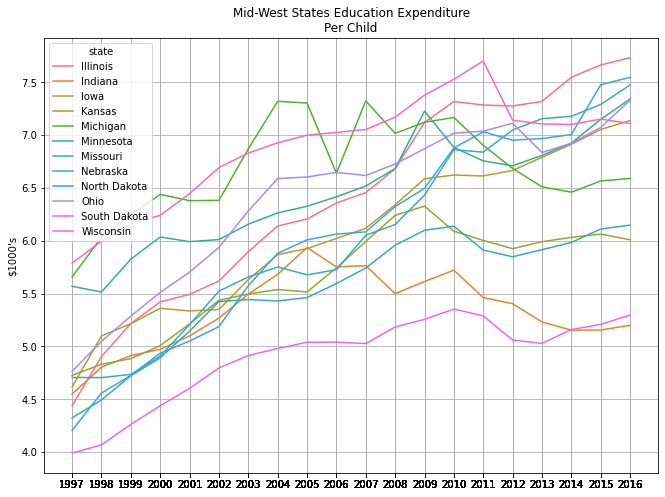

In [12]:
df_var_mask = df[df.variable == 'PK12ed']
selected_states = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 
                   'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
df_mask = df_var_mask.loc[df_var_mask['state'].isin(selected_states)]

dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)

p = sns.lineplot(ax=ax, x="year", y="inf_adj_perchild", hue="state", data=df_mask, markers=True)
p.set_xticks(df_mask['year'])
plt.grid()
plt.ticklabel_format(style = 'plain')
plt.title('Mid-West States Education Expenditure\nPer Child')
p.set_ylabel("$1000's")
p.set_xlabel(None)

The above plot gives a better idea of how the individual state spends it money. The variable on the y-axis is the amount of money spent per child(approx.)

This graph shows that there is a similar upwards trend in all of the states. They have their highs and lows, but ultimately they all trend upwards.

Text(0.5, 0, '')

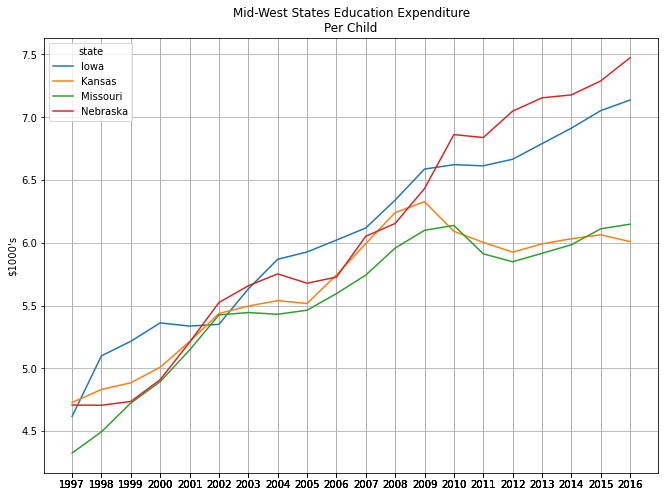

In [13]:
df_var_mask = df[df.variable == 'PK12ed']
selected_states = ['Iowa', 'Kansas', 'Missouri', 'Nebraska']
df_mask = df_var_mask.loc[df_var_mask['state'].isin(selected_states)]

dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)

p = sns.lineplot(ax=ax, x="year", y="inf_adj_perchild", hue="state", data=df_mask, markers=True)
p.set_xticks(df_mask['year'])
plt.grid()
plt.ticklabel_format(style = 'plain')
plt.title('Mid-West States Education Expenditure\nPer Child')
p.set_ylabel("$1000's")
p.set_xlabel(None)

### Summary


This was an exploration of data on the level of funding for primary education by midwestern states. 

In this analysis it was determined that there was a fairly consistent upward trend in the funding for primary education.
Some states like Indiana and Michigan peaked around 2005 and started to decrese their funding levels. It is also possible that some of these states will level out in the future. States like Missouri and Kansas have almost stagnated since 2005, with little to no vertical change overall.

So while a few states are stuck in their funding levels, the majority of them are on the upward trend to provide even better funding to primary education. This is a good sign, as more money in primary education means there are more resources to raise the next generation in a better way.

Since the data stops at 2016, this conclusion is not quite applicable to 2021. It is possible to assume the upward trend continues, but only new data will tell.